In [1]:
import numpy as np
import pandas as pd
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

0.0 1.0


(-4.0, 4.0)

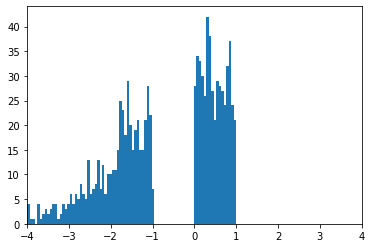

In [2]:
n=500
k=1
delta=1
med,MAD=0,1
loc,scale=med,MAD/0.6745
test1 = truncnorm(loc=loc,scale=scale,a=-np.inf,b=-1/scale).rvs(n-k+delta)
test1=np.append(test1,truncnorm(loc=loc,scale=scale,a=-1/scale,b=0).rvs(k-1))
test1=np.append(test1,truncnorm(loc=loc,scale=scale,a=0,b=1/scale).rvs(n-k))
test1=np.append(test1,truncnorm(loc=loc,scale=scale,a=1/scale,b=np.inf).rvs(k-delta))
test1=np.append(test1,[0,1])
test1=np.round(test1,8)
print(np.median(0),stats.median_abs_deviation(test1))

plt.hist(test1,bins=100);
plt.xlim(-4,4)


0.0 1.0


(-4.0, 4.0)

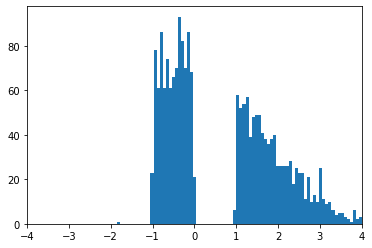

In [3]:
n=1000
k=n
delta=1
med,MAD=0,1
loc,scale=med,MAD/0.6745
testn = truncnorm(loc=loc,scale=scale,a=-np.inf,b=-1/scale).rvs(n-k+delta)
testn=np.append(testn,truncnorm(loc=loc,scale=scale,a=-1/scale,b=0).rvs(k-1))
testn=np.append(testn,truncnorm(loc=loc,scale=scale,a=0,b=1/scale).rvs(n-k))
testn=np.append(testn,truncnorm(loc=loc,scale=scale,a=1/scale,b=np.inf).rvs(k-delta))
testn=np.append(testn,[0,1])
testn=np.round(testn,8)
print(np.median(0),stats.median_abs_deviation(testn))

plt.hist(testn,bins=100);
plt.xlim(-4,4)

In [87]:
np.linspace(-4,4,81)

array([-4. , -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. ,
       -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9,
       -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8,
       -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,
        0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,
        1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,
        3.7,  3.8,  3.9,  4. ])

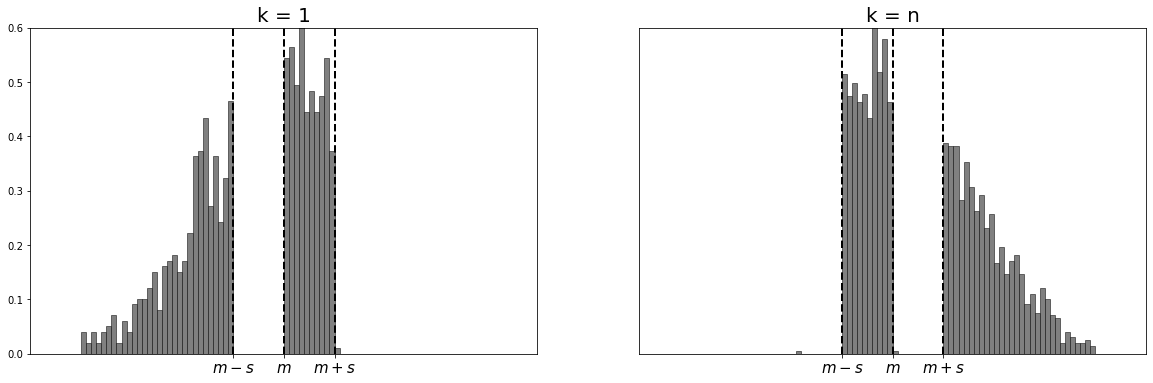

In [140]:
f,ax=plt.subplots(1,2,figsize=(20,6))
ax[0].hist(test1,bins=np.linspace(-4,4,81),color="grey",linewidth=0.5,edgecolor="black",density=True);
ax[0].set_title("k = 1",fontsize=20)
ax[1].set_title("k = n",fontsize=20)
ax[1].hist(testn,bins=np.linspace(-4,4,81),color="grey",linewidth=0.5,edgecolor="black",density=True);
ax[0].set_xlim(-5,5)
ax[1].set_xlim(-5,5)
ax[0].set_ylim(0,0.6)
ax[1].set_ylim(0,0.6)
ax[1].set_yticks([])
ax[0].set_xticks([-1, 0, 1], ["$m-s$", "$m$", "$m+s$"],fontsize=15)
ax[1].set_xticks([-1, 0, 1], ["$m-s$", "$m$", "$m+s$"],fontsize=15)
ax[0].axvline(x=0,color="black",linestyle="--",linewidth=2)
ax[0].axvline(x=1,color="black",linestyle="--",linewidth=2)
ax[0].axvline(x=-1,color="black",linestyle="--",linewidth=2)
ax[1].axvline(x=0,color="black",linestyle="--",linewidth=2)
ax[1].axvline(x=1,color="black",linestyle="--",linewidth=2)
ax[1].axvline(x=-1,color="black",linestyle="--",linewidth=2)



(-4.0, 4.0)

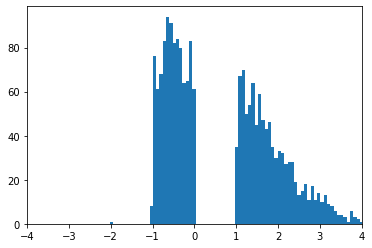

In [25]:

plt.hist(test1,bins=100);
plt.xlim(-4,4)

In [110]:
from RobustGibbs.MAD import *

In [ ]:
RobustGibbs.Gi

In [109]:
help("RobustGibbs")

Help on package RobustGibbs:

NAME
    RobustGibbs

PACKAGE CONTENTS
    IQR
    MAD
    Quantile
    postertior_sample
    truncated

FILE
    /Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/RobustGibbs/__init__.py




In [120]:
len(test1)

1001

In [132]:
import numpy as np
from scipy.stats import median_abs_deviation, norm, cauchy, weibull_min
from tqdm import tqdm


from RobustGibbs.truncated import *
from RobustGibbs.postertior_sample import posterior


def medMAD(X):
    return (np.median(X), median_abs_deviation(X))


def MAD_init(N, med, MAD, distribution):
    loc, scale, shape = 0, 1, 1.5

    if distribution in ["lognormal", "weibull"]:
        if MAD > med:
            raise Exception(
                "ERROR: MAD > med impossible for {} distribution !".format(distribution)
            )
        n = N // 2
        k = np.ceil(n / 2)
        if distribution == "lognormal":
            init_theta = [np.log(med), MAD / med, None]
            par_names = ["loc", "scale"]
        elif distribution == "weibull":
            init_theta = [0, med / np.log(2), shape]
            par_names = ["scale", "shape"]

        if N % 2 == 0:
            return (
                np.repeat(
                    [
                        med - 0.01 * MAD,
                        med + 0.01 * MAD,
                        med + MAD * 0.99,
                        med + MAD * 1.01,
                        med - 1.5 * MAD,
                        med - 0.5 * MAD,
                        med + 0.5 * MAD,
                        med + 1.5 * MAD,
                    ],
                    [1, 1, 1, 1, n - k, k - 1, n - k - 2, k - 1],
                ),
                init_theta,
                par_names,
            )
        return (
            np.repeat(
                [
                    med,
                    med + MAD,
                    med - 1.5 * MAD,
                    med - 0.5 * MAD,
                    med + 0.5 * MAD,
                    med + 1.5 * MAD,
                ],
                [1, 1, n - k + 1, k - 1, n - k, k - 1],
            ),
            init_theta,
            par_names,
        )
    if distribution == "normal":
        Z = norm(loc=loc, scale=scale).rvs(N)
        par_names = ["loc", "scale"]
    elif distribution == "cauchy":
        Z = cauchy(loc=loc, scale=scale).rvs(N)
        par_names = ["loc", "scale"]
    elif distribution == "translated_weibull":
        Z = weibull_min(c=shape, loc=loc, scale=scale).rvs(N)
        par_names = ["loc", "scale", "shape"]
    else:
        raise Exception("ERROR: distribution {} not implemented !".format(distribution))
    m_Z, s_Z = medMAD(Z)
    X_0 = np.round((Z - m_Z) / s_Z * MAD + med, 8)

    if distribution == "normal":
        init_theta = [med, MAD * 1.4826, shape]
    elif distribution == "cauchy":
        init_theta = [med, MAD, shape]
    elif distribution == "translated_weibull":
        init_theta = [(loc - m_Z) / s_Z * MAD + med, scale * MAD / s_Z, shape]

    return X_0, np.round(init_theta, 8), par_names


def resampling_even(
    X,
    theta,
    index=None,
    med=None,
    MAD=None,
    par=[],
    distribution="normal",
):
    def sym(m, x):
        return 2 * m - x

    def zone_even(xi, X, med=None, MAD=None, par=[]):
        X = np.array(X)
        n = len(X) // 2

        if len(par) == 0:
            n = len(X) // 2
            X_s = np.sort(X)
            med1 = X_s[n - 1]
            med2 = X_s[n]
            S = np.abs(X - med)
            S_s = np.sort(S)
            MAD1, MAD2 = S_s[n - 1], S_s[n]

            [i_MAD1, i_MAD2] = np.argsort(S)[n - 1 : n + 1]
            Xmad1, Xmad2 = X[[i_MAD1, i_MAD2]]
            par = [MAD1, MAD2, Xmad1, Xmad2, i_MAD1, i_MAD2, med1, med2]
        par = np.round(par, 8)
        [MAD1, MAD2, Xmad1, Xmad2, i_MAD1, i_MAD2, med1, med2] = par

        xi = np.round(xi, 8)
        if xi == med1:
            return "med1"
        elif xi == med2:
            return "med2"
        elif xi == np.round(med + MAD1, 8):
            return "med-MAD1"
        elif xi == np.round(med - MAD1, 8):
            return "med-MAD1"
        elif xi == np.round(med + MAD2, 8):
            return "med+MAD2"
        elif xi == np.round(med - MAD2, 8):
            return "med-MAD2"
        elif xi < np.round(med - MAD2, 8):
            return 1
        elif np.round(med - MAD1, 8) < xi < med1:
            return 2
        elif med2 < xi < np.round(med + MAD1, 8):
            return 3
        elif xi > np.round(med + MAD2, 8):
            return 4
        else:
            print(
                "PAS DE ZONE pour {}, m-MAD2 = {}, m-MAD1 ={}, m1 = {}, m2 = {}, m+MAD1 = {}, m+MAD2 = {}".format(
                    xi, med - MAD2, med - MAD1, med1, med2, med + MAD1, med + MAD2
                )
            )

    def zone_even_C_ab(xi, med1, med2, MAD1, MAD2):
        med = (med1 + med2) / 2
        if xi < med - MAD2:
            return med2, med + MAD1
        elif xi < med - MAD1:
            return med - MAD2, med - MAD1
        elif xi < med1:
            return med + MAD2, np.inf
        elif xi < med2:
            return med1, med2
        elif xi < med + MAD1:
            return -np.inf, med - MAD2
        elif xi < med + MAD2:
            return med + MAD1, med + MAD2
        else:
            return med - MAD1, med1

    def zone_even_S_ab(xi, med1, med2, MAD1, MAD2):
        med = (med1 + med2) / 2
        if xi < med - MAD2:
            return med + MAD2, np.inf
        elif xi < med - MAD1:
            return med + MAD1, med + MAD2
        elif xi < med1:
            return med2, med + MAD1
        elif xi < med2:
            return med1, med2
        elif xi < med + MAD1:
            return med - MAD1, med1
        elif xi < med + MAD2:
            return med - MAD2, med - MAD1
        else:
            return -np.inf, med - MAD2

    def zone_even_E_ab(xi, med1, med2, MAD1, MAD2):
        med, MAD = (med1 + med2) / 2, (MAD1 + MAD2) / 2
        if xi < med - MAD:
            return -np.inf, med - MAD
        elif xi < med1:
            return med - MAD, med1
        elif xi < med2:
            return med1, med2
        elif xi < med + MAD:
            return med2, med + MAD
        else:
            return med + MAD, np.inf

    def zone_even_ab(xi, med1, med2, MAD1, MAD2):
        med = (med1 + med2) / 2
        if xi < med - MAD2:
            return -np.inf, med - MAD2
        elif xi < med - MAD1:
            return med - MAD2, med - MAD1
        elif xi < med1:
            return med - MAD1, med1
        elif xi < med2:
            return med1, med2
        elif xi < med + MAD1:
            return med2, med + MAD1
        elif xi < med + MAD2:
            return med + MAD1, med + MAD2
        else:
            return med + MAD2, np.inf

    loc, scale, shape = theta
    if index == None:
        index = np.random.choice(len(X), 2, replace=False)
    X = np.array(X)
    xij = np.round(X[index], 8)
    xi, xj = xij[0], xij[1]
    n = len(X) // 2
    if len(par) == 0:
        n = len(X) // 2
        X_s = np.sort(X)
        med1 = X_s[n - 1]
        med2 = X_s[n]
        S = np.abs(X - med)
        S_s = np.sort(S)
        MAD1, MAD2 = S_s[n - 1], S_s[n]
        [i_MAD1, i_MAD2] = np.argsort(S)[n - 1 : n + 1]
        Xmad1, Xmad2 = X[[i_MAD1, i_MAD2]]
        par = [MAD1, MAD2, Xmad1, Xmad2, i_MAD1, i_MAD2, med1, med2]

    par = np.round(par, 8)

    MAD1, MAD2, Xmad1, Xmad2, i_MAD1, i_MAD2, med1, med2 = np.round(par, 8)
    change_med = False
    change_MAD = False

    if sorted(xij) == [med1, med2]:
        case = "1"
        s3 = np.sort(np.abs(X - med))[2]

        a, b = med - s3, med + s3
        xnew1 = truncated(
            a=(a - loc) / scale,
            b=(b - loc) / scale,
            size=1,
            loc=loc,
            scale=scale,
            distribution=distribution,
            shape=shape,
        )[0]

        xnew2 = sym(med, xnew1)

        change_med = True
    elif sorted(xij) == sorted([Xmad1, Xmad2]):
        S = np.sort(np.abs(X - med))
        epsilon = np.minimum(MAD1 - S[n - 2], S[n + 1] - MAD2)
        if xi < med and xj < med:
            case = "2b"
            a, b = med - MAD2 - epsilon, med - MAD1 + epsilon
            if a >= b:
                raise Exception("ERROR in med,MAD perturbation (case 2b) !")
            xnew1 = truncated(
                a=(a - loc) / scale,
                b=(b - loc) / scale,
                size=1,
                loc=loc,
                scale=scale,
                distribution=distribution,
                shape=shape,
            )[0]
            xnew2 = sym(med - MAD, xnew1)

        elif xi > med and xj > med:
            case = "2a"
            a, b = med + MAD1 - epsilon, med + MAD2 + epsilon
            if a >= b:
                raise Exception("ERROR in med,MAD perturbation (case 2a) !")

            xnew1 = truncated(
                a=(a - loc) / scale,
                b=(b - loc) / scale,
                size=1,
                loc=loc,
                scale=scale,
                distribution=distribution,
                shape=shape,
            )[0]
            xnew2 = sym(med + MAD, xnew1)
        else:
            case = "2c"
            a1, b1, a2, b2 = (
                med - MAD2 - epsilon,
                med - MAD1 + epsilon,
                med + MAD1 - epsilon,
                med + MAD2 + epsilon,
            )
            if a1 >= b1 or a2 >= b2:
                raise Exception("ERROR in med,MAD perturbation (case 2c) !")

            xnew1 = truncated_2inter(
                loc, scale, a1, b1, a2, b2, distribution=distribution, shape=shape
            )[0]
            if xnew1 > med:
                xnew2 = sym(med - MAD, sym(med, xnew1))
            else:
                xnew2 = sym(med + MAD, sym(med, xnew1))
        change_MAD = True

    elif (med1 in xij or med2 in xij) and (Xmad1 in xij or Xmad2 in xij):
        case = "3"
        xnew1, xnew2 = xi, xj
    elif med1 in xij or med2 in xij:
        if xi in [med1, med2]:
            xm, xother = xi, xj
        elif xj in [med1, med2]:
            xm, xother = xj, xi
        else:
            raise Exception("ERROR in med,MAD perturbation (case 4) !")
        if xm == med1 and med + MAD1 > xother > med:
            case = "4a"
            a, b = med, med + MAD1
            xnew1 = truncated(
                a=(a - loc) / scale,
                b=(b - loc) / scale,
                size=1,
                loc=loc,
                scale=scale,
                distribution=distribution,
                shape=shape,
            )[0]
            if xnew1 < med2:
                xnew2 = sym(med, xnew1)
                change_med = True
            else:
                xnew2 = xm
        elif xm == med2 and med - MAD1 < xother < med:
            case = "4b"
            a, b = med - MAD1, med
            xnew1 = truncated(
                a=(a - loc) / scale,
                b=(b - loc) / scale,
                size=1,
                loc=loc,
                scale=scale,
                distribution=distribution,
                shape=shape,
            )[0]
            if xnew1 > med1:
                xnew2 = sym(med, xnew1)
                change_med = True
            else:
                xnew2 = xm
        else:
            case = "4c"
            a, b = zone_even_ab(xother, med1, med2, MAD1, MAD2)
            xnew1 = truncated(
                a=(a - loc) / scale,
                b=(b - loc) / scale,
                size=1,
                loc=loc,
                scale=scale,
                distribution=distribution,
                shape=shape,
            )[0]
            xnew2 = xm
    elif Xmad1 in xij or Xmad2 in xij:
        if xi in [Xmad1, Xmad2]:
            xmad, xother = xi, xj
        elif xj in [Xmad1, Xmad2]:
            xmad, xother = xj, xi
        else:
            raise Exception("ERROR in med,MAD perturbation (case 5) !")
        if (xmad - med) * (xother - med) > 0 and (np.abs(xmad - med) - MAD) * (
            np.abs(xother - med) - MAD
        ) > 0:
            case = "5b "
            a, b = zone_even_ab(xother, med1, med2, MAD1, MAD2)
            xnew1 = truncated(
                a=(a - loc) / scale,
                b=(b - loc) / scale,
                size=1,
                loc=loc,
                scale=scale,
                distribution=distribution,
                shape=shape,
            )[0]
            xnew2 = xmad
        elif (xmad - med) * (xother - med) > 0 and (np.abs(xmad - med) - MAD) * (
            np.abs(xother - med) - MAD
        ) < 0:
            case = "5a"
            a, b = zone_even_E_ab(xother, med1, med2, MAD1, MAD2)
            xnew1 = truncated(
                a=(a - loc) / scale,
                b=(b - loc) / scale,
                size=1,
                loc=loc,
                scale=scale,
                distribution=distribution,
                shape=shape,
            )[0]
            if med - MAD2 <= xnew1 <= med - MAD1:
                xnew2 = sym(med - MAD, xnew1)
                change_MAD = True
            elif med + MAD1 <= xnew1 <= med + MAD2:
                xnew2 = sym(med + MAD, xnew1)
                change_MAD = True
            else:
                xnew2 = xmad
        elif (xmad - med) * (xother - med) < 0 and (np.abs(xmad - med) - MAD) * (
            np.abs(xother - med) - MAD
        ) > 0:
            case = "5c "
            a1, b1 = zone_even_ab(xother, med1, med2, MAD1, MAD2)
            a2, b2 = zone_even_S_ab(xother, med1, med2, MAD1, MAD2)
            xnew1 = truncated_2inter(loc, scale, a1, b1, a2, b2, shape=shape)[0]
            if a2 <= xnew1 <= b2:
                xnew2 = sym(med, xmad)
                if xmad == Xmad1:
                    Xmad1 = sym(med, Xmad1)
                elif xmad == Xmad2:
                    Xmad2 = sym(med, Xmad2)
                else:
                    raise Exception("ERROR in med,MAD perturbation (case 5c) !")
            else:
                xnew2 = xmad

        else:
            case = "5d "
            a, b = zone_even_E_ab(xother, med1, med2, MAD1, MAD2)
            xnew1 = truncated(
                a=(a - loc) / scale,
                b=(b - loc) / scale,
                size=1,
                loc=loc,
                scale=scale,
                distribution=distribution,
                shape=shape,
            )[0]
            if med - MAD2 <= xnew1 <= med - MAD1:
                xnew2 = sym(med + MAD, sym(med, xnew1))
                change_MAD = True
            elif med + MAD1 <= xnew1 <= med + MAD2:
                xnew2 = sym(med - MAD, sym(med, xnew1))
                change_MAD = True
            else:
                xnew2 = xmad

    else:
        l_zone = [
            zone_even(xi, X, med=med, MAD=MAD, par=par),
            zone_even(xj, X, med=med, MAD=MAD, par=par),
        ]
        sort_zone = sorted(l_zone)
        if sort_zone in [[1, 2], [3, 4]]:
            case = "6a "
            if xi < med:
                a, b = -np.inf, med1
            else:
                a, b = med2, np.inf
            xnew1 = truncated(
                a=(a - loc) / scale,
                b=(b - loc) / scale,
                size=1,
                loc=loc,
                scale=scale,
                distribution=distribution,
                shape=shape,
            )[0]
            if med - MAD2 <= xnew1 <= med - MAD1:
                xnew2 = sym(med - MAD, xnew1)
                change_MAD = True
            elif med + MAD1 <= xnew1 <= med + MAD2:
                xnew2 = sym(med + MAD, xnew1)
                change_MAD = True
            elif xnew1 < med - MAD2:
                xnew2 = truncated(
                    a=(med - MAD1 - loc) / scale,
                    b=(med1 - loc) / scale,
                    size=1,
                    loc=loc,
                    scale=scale,
                    distribution=distribution,
                    shape=shape,
                )[0]
            elif xnew1 > med + MAD2:
                xnew2 = truncated(
                    a=(med2 - loc) / scale,
                    b=(med + MAD1 - loc) / scale,
                    size=1,
                    loc=loc,
                    scale=scale,
                    distribution=distribution,
                    shape=shape,
                )[0]
            elif med1 > xnew1 > med - MAD1:
                xnew2 = truncated(
                    a=-np.inf,
                    b=(med - MAD2 - loc) / scale,
                    size=1,
                    loc=loc,
                    scale=scale,
                    distribution=distribution,
                    shape=shape,
                )[0]
            else:
                xnew2 = truncated(
                    a=(med + MAD2 - loc) / scale,
                    b=np.inf,
                    size=1,
                    loc=loc,
                    scale=scale,
                    distribution=distribution,
                    shape=shape,
                )[0]
        elif sort_zone == [2, 3]:
            case = "6b "
            xnew1 = truncated(
                a=(med - MAD1 - loc) / scale,
                b=(med + MAD1 - loc) / scale,
                size=1,
                loc=loc,
                scale=scale,
                distribution=distribution,
                shape=shape,
            )[0]
            if med1 < xnew1 < med2:
                xnew2 = sym(med, xnew1)
                change_med = True
            elif xnew1 < med1:
                xnew2 = truncated(
                    a=(med2 - loc) / scale,
                    b=(med + MAD1 - loc) / scale,
                    size=1,
                    loc=loc,
                    scale=scale,
                    distribution=distribution,
                    shape=shape,
                )[0]
            else:
                xnew2 = truncated(
                    a=(med - MAD1 - loc) / scale,
                    b=(med1 - loc) / scale,
                    size=1,
                    loc=loc,
                    scale=scale,
                    distribution=distribution,
                    shape=shape,
                )[0]
        elif sort_zone in [[1, 3], [2, 4]]:
            case = "6c "
            xnew1 = truncated_2inter(
                loc, scale, -np.inf, med1, med2, np.inf, distribution=distribution
            )[0]
            if med - MAD2 <= xnew1 <= med - MAD1:
                xnew2 = sym(med + MAD, sym(med, xnew1))
                change_MAD = True
            elif med + MAD1 <= xnew1 <= med + MAD2:
                xnew2 = sym(med - MAD, sym(med, xnew1))
                change_MAD = True

            else:
                a, b = zone_even_C_ab(xnew1, med1, med2, MAD1, MAD2)
                xnew2 = truncated(
                    a=(a - loc) / scale,
                    b=(b - loc) / scale,
                    size=1,
                    loc=loc,
                    scale=scale,
                    distribution=distribution,
                    shape=shape,
                )[0]
        else:
            case = "6d"
            a1, b1 = zone_even_ab(xi, med1, med2, MAD1, MAD2)
            xnew1 = truncated(
                a=(a1 - loc) / scale,
                b=(b1 - loc) / scale,
                size=1,
                loc=loc,
                scale=scale,
                distribution=distribution,
                shape=shape,
            )[0]
            a2, b2 = zone_even_ab(xj, med1, med2, MAD1, MAD2)
            xnew2 = truncated(
                a=(a2 - loc) / scale,
                b=(b2 - loc) / scale,
                size=1,
                loc=loc,
                scale=scale,
                distribution=distribution,
                shape=shape,
            )[0]

    [xnew1, xnew2] = np.round([xnew1, xnew2], 8)
    X[index] = np.array([xnew1, xnew2]).reshape(-1)

    if change_med:
        [med1, med2] = sorted([xnew1, xnew2])

    if change_MAD:
        S_s = np.sort([np.abs(xnew1 - med), np.abs(xnew2 - med)])
        [MAD1, MAD2] = S_s.reshape(-1)

        [Xmad1, Xmad2] = np.array([xnew1, xnew2])[
            np.argsort([np.abs(xnew1 - med), np.abs(xnew2 - med)])
        ].reshape(-1)
        [i_MAD1, i_MAD2] = np.array(index)[
            np.argsort([np.abs(xnew1 - med), np.abs(xnew2 - med)])
        ]

    par = np.round(
        np.array([MAD1, MAD2, Xmad1, Xmad2, i_MAD1, i_MAD2, med1, med2]).squeeze(), 8
    )

    return X, par, case


## ODD CASE


def resampling_odd(
    X,
    theta=None,
    index=None,
    med=None,
    MAD=None,
    par=[],
    distribution="normal",
):
    def zone_odd(xi, med, MAD):
        xi = np.round(xi, 8)

        if xi == med:
            return "med"
        elif xi == np.round(med + MAD, 8):
            return "med+MAD"
        elif xi == np.round(med - MAD, 8):
            return "med-MAD"
        elif xi < med - MAD:
            return 1
        elif xi < med:
            return 2
        elif xi < med + MAD:
            return 3
        else:
            return 4

    def zone_odd_C_ab(xi, med, MAD):
        xi = np.round(xi, 8)
        if xi == med:
            return med, med
        elif xi == np.round(med - MAD, 8):
            return np.round(med + MAD, 8), np.round(med + MAD, 8)
        elif xi == np.round(med + MAD, 8):
            return np.round(med - MAD, 8), np.round(med - MAD, 8)
        elif xi < med - MAD:
            return med, np.round(med + MAD, 8)
        elif xi < med:
            return np.round(med + MAD, 8), np.inf
        elif xi < med + MAD:
            return -np.inf, np.round(med - MAD, 8)
        else:
            return np.round(med - MAD, 8), med

    def zone_odd_ab(xi, med, MAD):
        xi = np.round(xi, 8)

        if xi == med:
            return med, med
        elif xi == np.round(med + MAD, 8):
            return np.round(med + MAD, 8), np.round(med + MAD, 8)
        elif xi == np.round(med - MAD, 8):
            return np.round(med - MAD, 8), np.round(med - MAD, 8)
        elif xi < med - MAD:
            return -np.inf, np.round(med - MAD, 8)
        elif xi < med:
            return np.round(med - MAD, 8), med
        elif xi < med + MAD:
            return med, np.round(med + MAD, 8)
        else:
            return np.round(med + MAD, 8), np.inf

    loc, scale, shape = theta
    if index == None:
        index = np.random.choice(len(X), 2, replace=False)
    xij = np.round(X[index], 8)
    xij = X[index]
    xi, xj = xij[0], xij[1]
    a, b = 0, 0
    if len(par) == 0:
        if np.round(med + MAD, 8) in X:
            xmad = np.round(med + MAD, 8)
        elif np.round(med - MAD, 8) in X:
            xmad = np.round(med - MAD, 8)
        else:
            raise Exception("No MAD found!")
        i_MAD = np.where(X == xmad)[0][0]
        par = [i_MAD, xmad]
    [i_MAD, xmad] = par
    med, xmad = np.round([med, xmad], 8)

    if med in xij and xmad in xij:
        case = "1"
        xnew1, xnew2 = xi, xj
    elif med in xij:
        case = "2"
        if xi == med:
            xother = xj
        elif xj == med:
            xother = xi
        else:
            print("Probleme m")
        a, b = zone_odd_ab(xother, med, MAD)
        xnew1, xnew2 = (
            truncated(
                a=(a - loc) / scale,
                b=(b - loc) / scale,
                size=1,
                loc=loc,
                scale=scale,
                distribution=distribution,
                shape=shape,
            )[0],
            med,
        )
    elif xmad in xij:
        if xi == xmad:
            xother = xj
        elif xj == xmad:
            xother = xi
        else:
            print("Probleme xmad")
        if (xmad - med) * (xother - med) > 0:
            case = "3a"
            a, b = zone_odd_ab(xother, med, MAD)
            xnew1, xnew2 = (
                truncated(
                    a=(a - loc) / scale,
                    b=(b - loc) / scale,
                    size=1,
                    loc=loc,
                    scale=scale,
                    distribution=distribution,
                    shape=shape,
                )[0],
                xmad,
            )
        else:
            if np.abs(xother - med) > MAD:
                xnew1 = truncated_2inter(
                    loc,
                    scale,
                    -np.inf,
                    med - MAD,
                    med + MAD,
                    np.inf,
                    distribution=distribution,
                    shape=shape,
                )[0]
                case = "3b"
            else:
                case = "3c"
                # case = "3c : {} devient {} dans R et {} devient {} dans [{},{}]".format(round(xi,3),round(xnew1,3),round(xj,3),round(xnew2,3),a,b)
                a, b = med - MAD, med + MAD
                xnew1 = truncated(
                    a=(a - loc) / scale,
                    b=(b - loc) / scale,
                    size=1,
                    loc=loc,
                    scale=scale,
                    distribution=distribution,
                    shape=shape,
                )[0]
            if xnew1 > med:
                xmad = np.round(med - MAD, 8)
            else:
                xmad = np.round(med + MAD, 8)
            xnew2 = xmad
            # print("xmad devient",xmad)
        i_MAD = index[1]
    else:
        if type(zone_odd(xi, med, MAD)) != str and type(zone_odd(xj, med, MAD)) != str:
            if sorted([zone_odd(xi, med, MAD), zone_odd(xj, med, MAD)]) in [
                [1, 3],
                [2, 4],
            ]:
                case = "4a"
                if distribution == "normal":
                    xnew1 = norm(loc=loc, scale=scale).rvs(1)[0]
                elif distribution == "cauchy":
                    xnew1 = cauchy(loc=loc, scale=scale).rvs(1)[0]
                elif distribution == "weibull":
                    xnew1 = weibull_min(c=shape, scale=scale, loc=loc).rvs(1)[0]
                elif distribution == "translated_weibull":
                    xnew1 = weibull_min(c=shape, scale=scale).rvs(1)[0]
                a, b = zone_odd_C_ab(xnew1, med, MAD)
                xnew2 = truncated(
                    a=(a - loc) / scale,
                    b=(b - loc) / scale,
                    size=1,
                    loc=loc,
                    scale=scale,
                    distribution=distribution,
                    shape=shape,
                )[0]
            else:
                case = "4b"
                a1, b1 = zone_odd_ab(xi, med, MAD)
                a2, b2 = zone_odd_ab(xj, med, MAD)
                xnew1, xnew2 = (
                    truncated(
                        a=(a1 - loc) / scale,
                        b=(b1 - loc) / scale,
                        size=1,
                        loc=loc,
                        scale=scale,
                        distribution=distribution,
                        shape=shape,
                    )[0],
                    truncated(
                        a=(a2 - loc) / scale,
                        b=(b2 - loc) / scale,
                        size=1,
                        loc=loc,
                        scale=scale,
                        distribution=distribution,
                        shape=shape,
                    )[0],
                )
        else:
            raise Exception("ERROR in med,MAD perturbation !")
            xnew1, xnew2 = xi, xj
            case = "erreur"
    # print(X[index],np.round(np.array([xnew1, xnew2]),8),case)
    X[index] = np.round(np.array([xnew1, xnew2]), 8).reshape(-1)

    return X, [i_MAD, np.round(xmad, 8)], case


def resampling_med_MAD(
    X,
    theta=None,
    index=None,
    med=None,
    MAD=None,
    par=[],
    distribution="normal",
):
    if len(X) % 2 == 0:
        return resampling_even(
            X=X,
            theta=theta,
            index=index,
            med=med,
            MAD=MAD,
            par=par,
            distribution=distribution,
        )
    return resampling_odd(
        X=X,
        theta=theta,
        index=index,
        med=med,
        MAD=MAD,
        par=par,
        distribution=distribution,
    )


### GIBBS SAMPLER


def Gibbs_med_MAD(
    T: int,
    N: int,
    med: float,
    MAD: float,
    distribution: str = "normal",
    prior_loc: str = "normal",
    prior_scale: str = "gamma",
    prior_shape: str = "gamma",
    X_0: list = [],
    par_prior_loc: list = [0, 1],
    par_prior_scale: list = [0, 1],
    par_prior_shape: list = [0, 1],
    std_prop_loc: float = 0.1,
    std_prop_scale: float = 0.1,
    std_prop_shape: float = 0.1,
    List_X: bool = False,
    verbose: bool = True,
) -> dict:
    """Gibbs sampler to sample from the posterior of model parameters given the median and MAD of the data.

       Args:
        T (int): Number of iterations.
        N (int): Size of the vector X.
        med (float): Observed median.
        MAD (float): Observed MAD (Median Absolute Deviation)
        distribution (str): Distribution of the data ("normal", "cauchy", "weibull", or "translated_weibull").
        prior_loc (str): Prior distribution of the location parameter ("normal", "cauchy", "uniform", or "none").
        prior_scale (str): Prior distribution of the scale parameter ("gamma","jeffreys").
        prior_shape (str): Prior distribution of the shape parameter ("gamma").
        par_prior_loc (list, optional): Prior hyperparameters for the location parameter. Defaults to [0, 1].
        par_prior_scale (list, optional): Prior hyperparameters for the scale parameter. Defaults to [1, 1].
        par_prior_shape (list, optional): Prior hyperparameters for the shape parameter. Defaults to [0, 1].
        std_prop_loc (float, optional): Standard deviation of the RWMH Kernel for the location parameter. Defaults to 0.1.
        std_prop_scale (float, optional): Standard deviation of the RWMH Kernel for the scale parameter. Defaults to 0.1.
        std_prop_shape (float, optional): Standard deviation of the RWMH Kernel for the shape parameter. Defaults to 0.1.
        List_X (bool, optional): If True, will return the list of all latent vectors X. Otherwise, it will return the first and the last. Defaults to False.
        verbose (bool, optional): If True, will display the progression of the sampling. Defaults to True.
    Returns:
        A dictionary containing:
            chains (dict): The chains sampled from the parameters' posterior.
            X (list): List of latent vectors.
            ... input parameters"""

    med, MAD = np.round([med, MAD], 8)
    if X_0==[]:
        X_0, init_theta, par_names = MAD_init(N, med, MAD, distribution)
    else:
        init_theta=[np.mean(X_0),np.std(X_0),0]
        par_names=["loc","scale","shape"]
        
    Theta = [init_theta]
    X_list = [X_0]
    par = []
    # K=[np.sum(np.where(X_0>med+MAD,1,0))]

    X = X_0.copy()

    for i in tqdm(range(T), disable=not (verbose)):
        X, par, case = resampling_med_MAD(
            X,
            Theta[-1],
            med=med,
            MAD=MAD,
            distribution=distribution,
            par=par,
        )

        theta = posterior(
            X,
            Theta[-1],
            distribution,
            prior_loc,
            prior_scale,
            prior_shape,
            par_prior_loc,
            par_prior_scale,
            par_prior_shape,
            std_prop_loc,
            std_prop_scale,
            std_prop_shape,
        )
        Theta.append(theta)
        if List_X:
            X_list.append(X.copy())

    if not (List_X):
        X_list.append(X.copy())

    Theta = np.array(Theta).T
    chains0 = {
        par_name: Theta[i] for i, par_name in enumerate(["loc", "scale", "shape"])
    }
    chains = {par_name: chains0[par_name] for par_name in par_names}
    if verbose and prior_loc != "NIG":
        acceptation_rate = [
            (len(np.unique(chains[par_name])) - 1) / T for par_name in par_names
        ]
        print("Acceptation rates MH :", end=" ")
        for i in range(len(par_names)):
            print("{} = {:.2%}".format(par_names[i], acceptation_rate[i]), end=" ")
        print()

    return {
        "X": X_list,
        "chains": chains,
        "N": N,
        "med": med,
        "MAD": MAD,
        "distribution": distribution,
        "prior_loc": prior_loc,
        "prior_scale": prior_scale,
        "prior_shape": prior_shape,
        "par_prior_loc": par_prior_loc,
        "par_prior_scale": par_prior_scale,
        "par_prior_shape": par_prior_shape,
        "T": T,
    }


In [128]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from tqdm import tqdm

def save_histogram_gif(vectors, filename):
    # create a list to store the histogram images
    images = []

    x=np.linspace(-4,4,20)
    x1=np.linspace(-4,4,1000)
    # loop through each vector in the list
    K=[]
    delta=[]
    b=1000
    vectors1=vectors[:]
    for vector in tqdm(vectors1):
        K.append(np.sum(np.where(vector>1,1,0)))
        delta.append(np.sum(np.where(vector==1,1,0)))
        if len(K)%b==0 or len(K)==1:
            
            # create a histogram of the vector
            plt.figure(1,figsize=(40,16))
            plt.suptitle("Iteration "+str(max(len(K),1)),fontsize=30)
            plt.subplot(1, 2, 1)
            plt.hist(vector,bins=20,color="grey",linewidth=0.5,edgecolor="black",density=True);
            plt.xticks([-1, 0, 1], ["med-MAD", "med", "med+MAD"],fontsize=20)
            plt.axvline(x=0, color="black", linewidth=0.5)
            plt.axvline(x=1, color="black", linewidth=0.5)
            plt.axvline(x=-1, color="black", linewidth=0.5)
            plt.xlim(-4,4)
            plt.ylim(0,.4)
            plt.plot(x1,norm(0,1.4826).pdf(x1),color="red",linestyle="--",lw=2)
            
            plt.subplot(2, 2, 2)

            plt.plot(np.linspace(0,len(K),len(K)+1)[:-1],K)
            plt.axhline(len(vector)//4, color="grey", linewidth=0.5,linestyle="--")
            plt.xlim(0,len(vectors1))
            plt.ylim(150,350)
            plt.xlabel("")
            plt.ylabel("$k$",fontsize=20)
            # # save the histogram as an image
            plt.subplot(2, 2, 4)
            plt.plot(np.linspace(0,len(delta),len(delta)+1)[:-1],delta)

            plt.xlim(0,len(vectors1))
            plt.ylim(-.1,1.1)
            plt.ylabel("$\delta$",fontsize=20)
            plt.xlabel("Iterations",fontsize=20)
            plt.savefig("hist/histogram_{}.png".format(len(K)//b))
            
            # add the image to the list of images
            images.append(imageio.imread("hist/histogram_{}.png".format(len(K)//b)))
            
            # clear the plot for the next iteration
            plt.clf()
    
    print("K=",K)
    print("delta=",delta)
    print("\nSaving gif...")
    # save the list of images as a gif
    imageio.mimsave(filename, images,duration=.01)
    print("DONE!")


In [100]:
K = [np.sum(np.where(vector>1,1,0)) for vector in test["X"]]
delta = [np.sum(np.where(vector==1,1,0)) for vector in test["X"]]

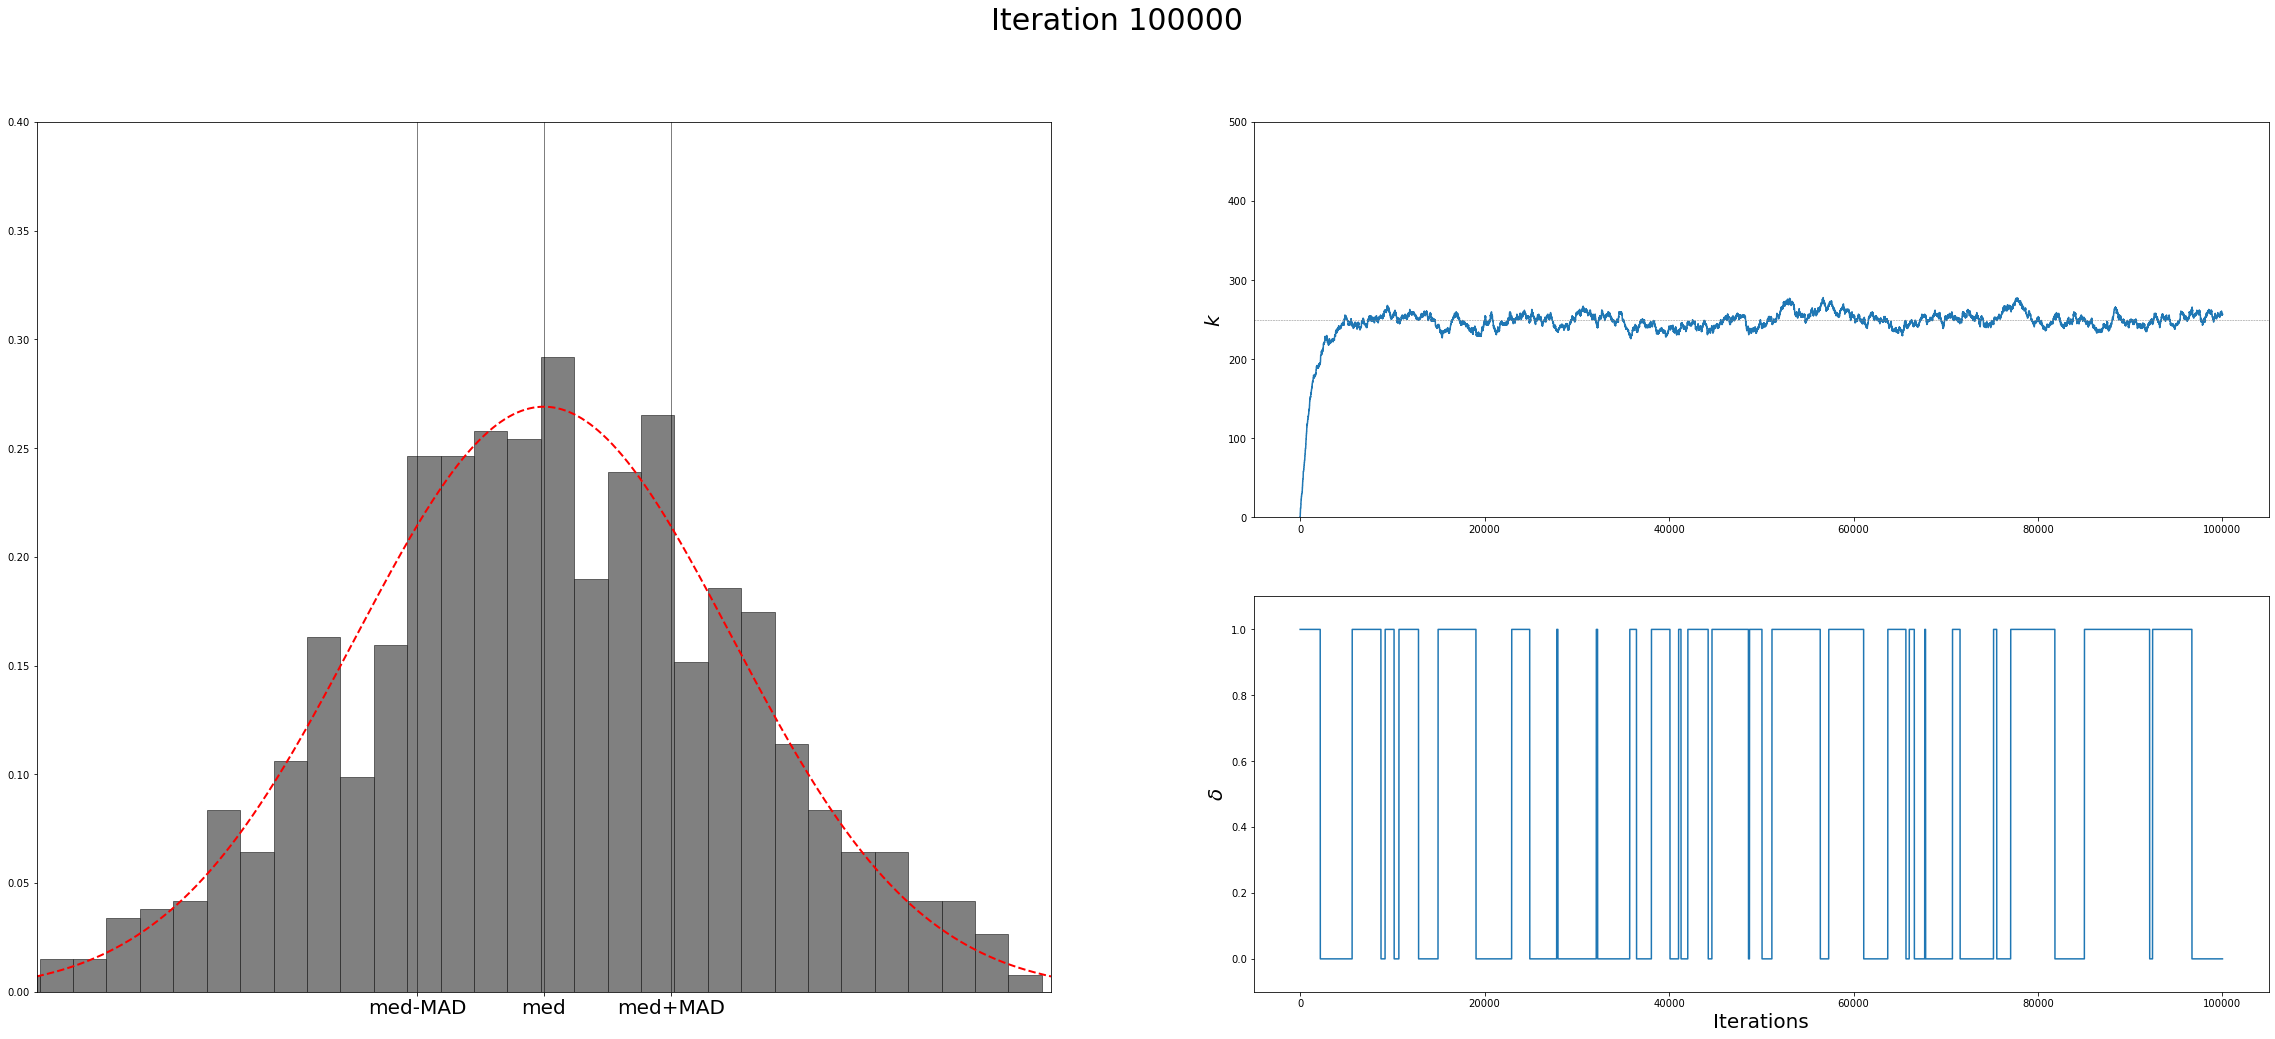

In [104]:
plt.figure(1,figsize=(40,16))
plt.suptitle("Iteration "+str(max(len(K),1)-1),fontsize=30)
plt.subplot(1, 2, 1)
plt.hist(test["X"][-1],bins=40,color="grey",linewidth=0.5,edgecolor="black",density=True);
plt.xticks([-1, 0, 1], ["med-MAD", "med", "med+MAD"],fontsize=20)
plt.axvline(x=0, color="black", linewidth=0.5)
plt.axvline(x=1, color="black", linewidth=0.5)
plt.axvline(x=-1, color="black", linewidth=0.5)
plt.xlim(-4,4)
plt.ylim(0,.4)
x1=np.linspace(-4,4,1000)
plt.plot(x1,norm(0,1.4826).pdf(x1),color="red",linestyle="--",lw=2)

plt.subplot(2, 2, 2)

plt.plot(K)
plt.axhline(len(test["X"][-1])//4, color="grey", linewidth=0.5,linestyle="--")

plt.ylim(0,len(test["X"][-1])//2)
plt.xlabel("")
plt.ylabel("$k$",fontsize=20)
# # save the histogram as an image
plt.subplot(2, 2, 4)
plt.plot(delta)

plt.ylim(-.1,1.1)
plt.ylabel("$\delta$",fontsize=20)
plt.xlabel("Iterations",fontsize=20)
plt.savefig("hist_final.png")

            # add the image to the list of images
plt.show()

In [135]:
save_histogram_gif(test_0["X"], "test_0.gif")

  0%|          | 0/100001 [00:00<?, ?it/s]

/Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
100%|██████████| 100001/100001 [00:37<00:00, 2648.74it/s]


K= [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 4, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 19, 20, 20, 20, 20, 20, 20, 20, 21, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 31, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 42, 43, 44, 44, 44, 44, 44, 45, 45, 45, 45, 46, 46, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 51, 51, 51

<Figure size 2880x1152 with 0 Axes>

In [134]:
test_0= Gibbs_med_MAD(100000,1001,0,1,"normal","NIG",List_X=True,X_0=test1)

/Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:920: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
100%|██████████| 100000/100000 [00:48<00:00, 2074.14it/s]


In [130]:
from MAD import Gibbs_med_MAD

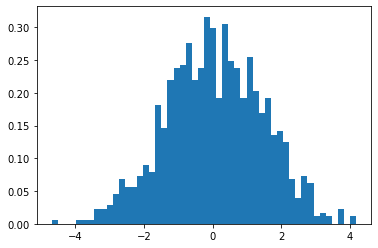

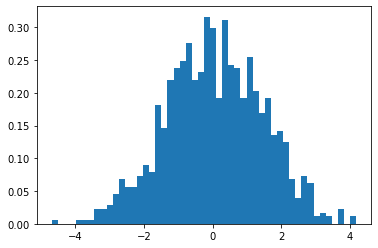

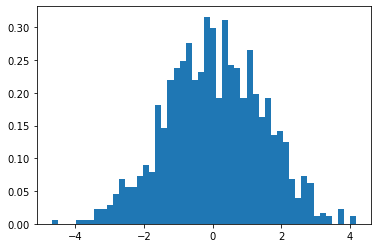

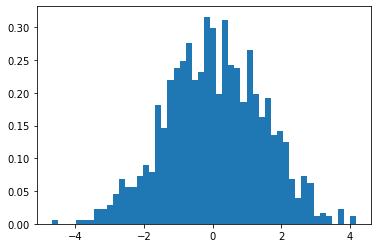

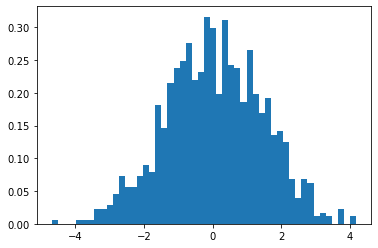

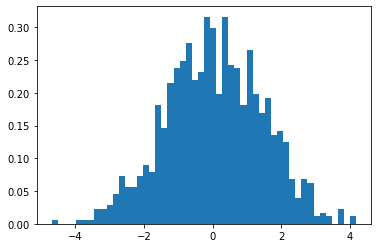

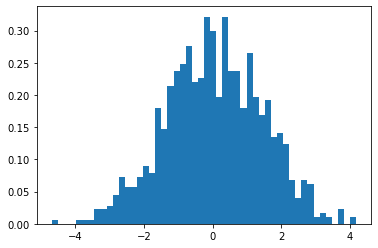

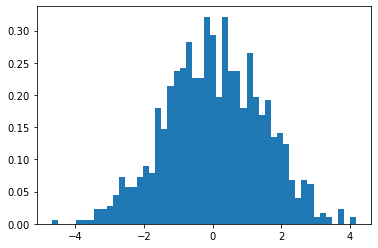

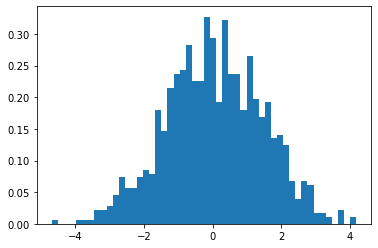

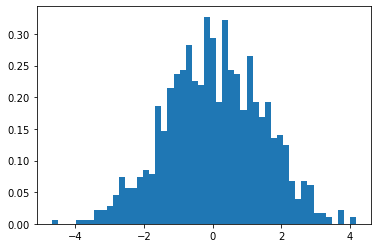

In [117]:
for X in test["X"][:10]:
    plt.hist(X,bins=50,density=True);
    plt.show()